# Exploratory Data Analysis

This file explore the metadata variables and their categroies. This initally was comprsed of the following:

- Lesion Class type: 8 classes including melanoma (MEL), melanocytic nevus (NV), basal cell carcinoma (BCC), actinic keratosis (AK), benign keratosis (BKL), dermatofibroma (DF), vascular lesion (VASC), squamous cell carcinoma (SCC).
- Gender: contained two categories; male and female.
- Age: a group for the nearest 5th year from 0 to 85 years.
- Skin tone: six fitzpatrick skin tones, from 1-6.
- Skin lesion anatomical location: contained eight categories, including anterior torso, head/neck, lateral torso, lower extremity, oral/genital, palms/soles, posterior torso and upper extremity.

After data manipluation the metadata variables were the same except for the Skin lesion class and age, which were now structured as:

- Class: melanoma (MEL) and non-melanoma (NONMEL).
- Age: four categories; 0-20, 21-40, 41-60 and >60 years.

EDA has been performed in both cases, for the whole dataset as well as for each split, train, validation and test to ensure each split was representative of the whole dataset.

In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# EDA for 8 class dataset

##For total data set

In [ ]:
isic_metadata = pandas.read_csv('/content/drive/MyDrive/Dissertation/skin_lesion_data/ISIC_2019_Training_Metadata.csv')
print(isic_metadata)

              image  age_approx anatom_site_general    lesion_id     sex
0      ISIC_0000000        55.0      anterior torso          NaN  female
1      ISIC_0000001        30.0      anterior torso          NaN  female
2      ISIC_0000002        60.0     upper extremity          NaN  female
3      ISIC_0000003        30.0     upper extremity          NaN    male
4      ISIC_0000004        80.0     posterior torso          NaN    male
...             ...         ...                 ...          ...     ...
25326  ISIC_0073247        85.0           head/neck  BCN_0003925  female
25327  ISIC_0073248        65.0      anterior torso  BCN_0001819    male
25328  ISIC_0073249        70.0     lower extremity  BCN_0001085    male
25329  ISIC_0073251        55.0         palms/soles  BCN_0002083  female
25330  ISIC_0073254        50.0     upper extremity  BCN_0001079    male

[25331 rows x 5 columns]


In [ ]:
ground_truth = pandas.read_csv('/content/drive/MyDrive/Dissertation/skin_lesion_data/ISIC_2019_Training_GroundTruth.csv')
print(ground_truth)

              image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0      ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1      ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2      ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3      ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4      ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
...             ...  ...  ...  ...  ...  ...  ...   ...  ...  ...
25326  ISIC_0073247  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0
25327  ISIC_0073248  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0
25328  ISIC_0073249  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25329  ISIC_0073251  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25330  ISIC_0073254  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0

[25331 rows x 10 columns]


### Age

(0.0, 5080.0)

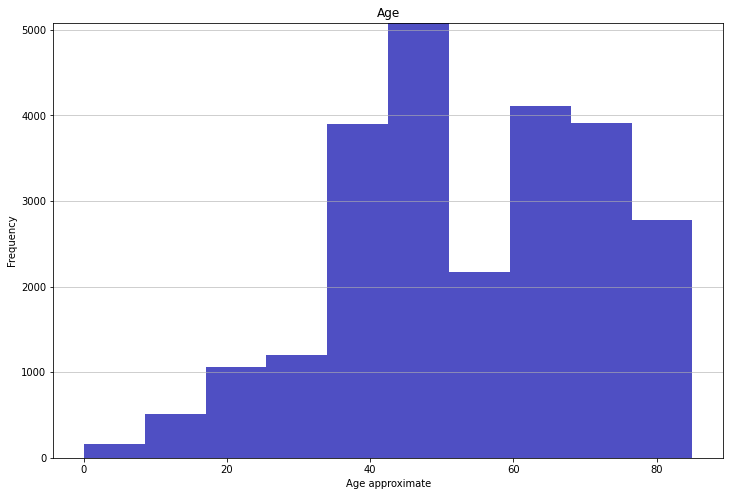

In [ ]:
# Histogram for age
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(x=isic_metadata["age_approx"], color='#0504aa',
                            alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age approximate')
plt.ylabel('Frequency')
plt.title('Age')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

### Gender

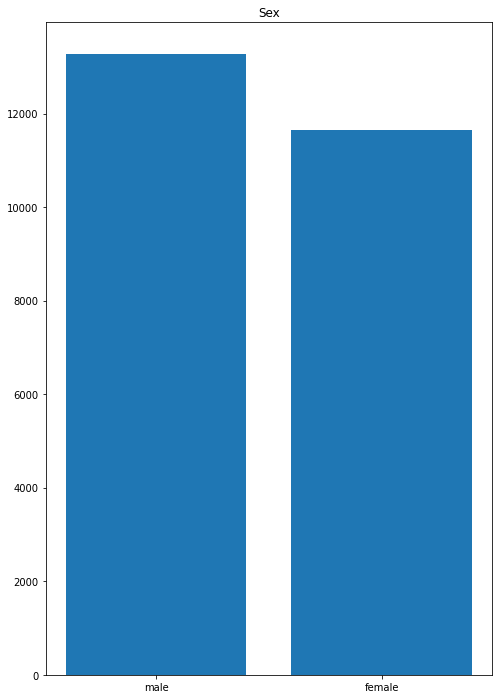

In [ ]:
# Histogram for gender
sex_df = isic_metadata.sex.value_counts()
# sex_df.index

fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(1,1,1)
ax.bar(sex_df.index, sex_df.values)
ax.set_title('Sex')
plt.show()

### Lesion Anatomical Location

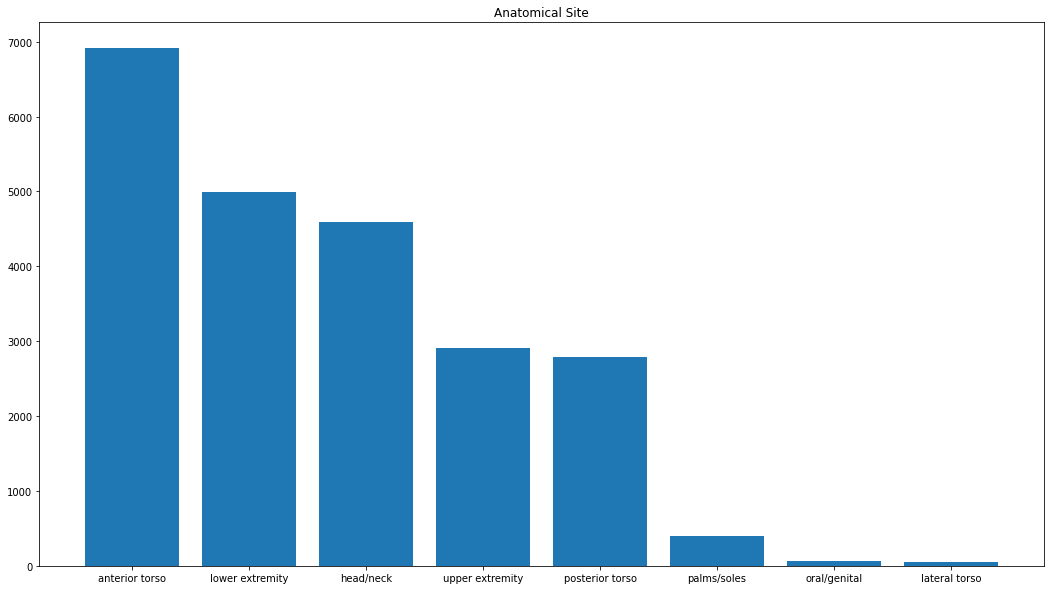

In [ ]:
# histogram for anatom_site_general

site_df = isic_metadata.anatom_site_general.value_counts()

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1,1,1)
ax.bar(site_df.index, site_df.values)
ax.set_title('Anatomical Site')
plt.show()

### Lesion Class Type

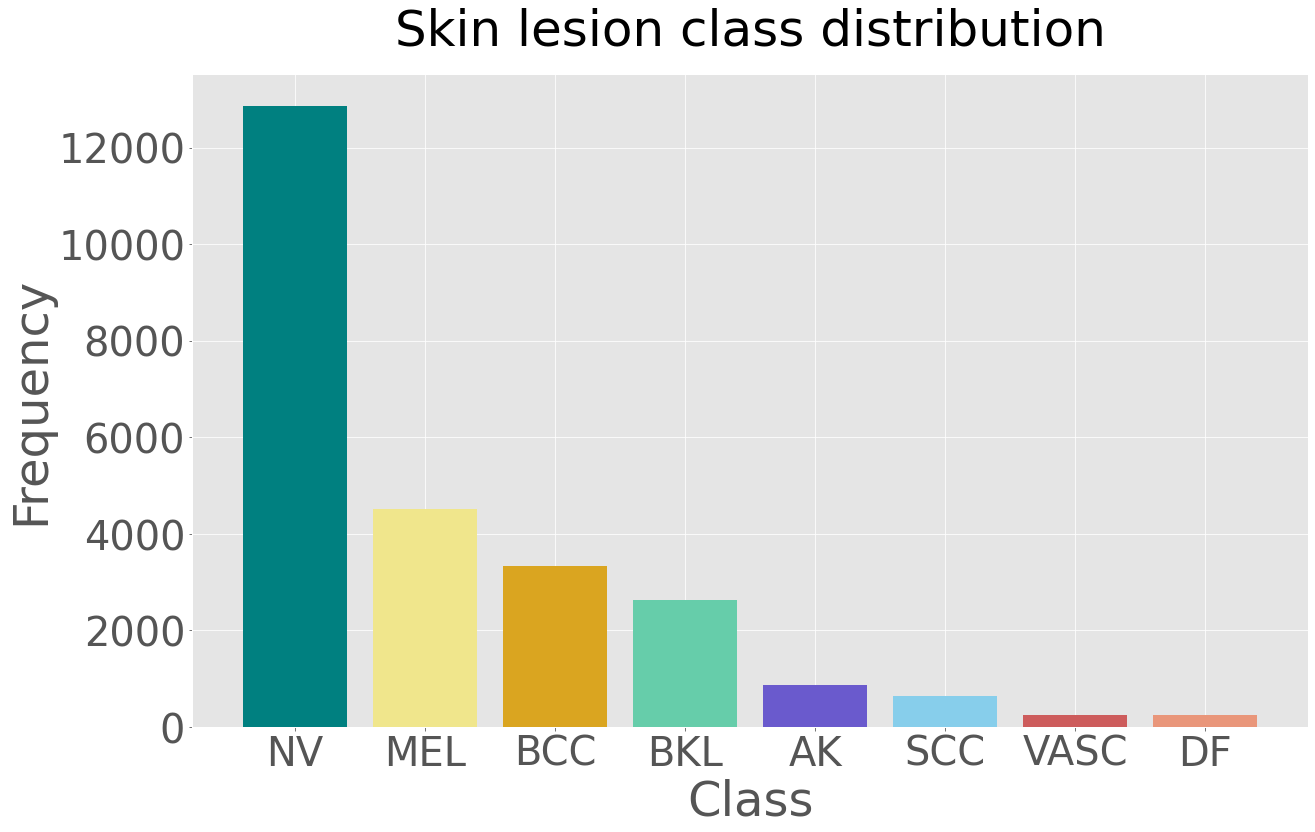

In [ ]:
# split of data across lesion type
plt.style.use('ggplot')
lesion_type = ("NV", "MEL", "BCC", "BKL", "AK", "SCC", "VASC", "DF")

lesion_freq = (sum(ground_truth["NV"]), sum(ground_truth["MEL"]),
               sum(ground_truth["BCC"]), sum(ground_truth["BKL"]),
               sum(ground_truth["AK"]), sum(ground_truth["SCC"]),
               sum(ground_truth["VASC"]), sum(ground_truth["DF"]))


lesion_df = pandas.DataFrame(list(zip(lesion_type, lesion_freq)),
                  columns=['lesion_type', 'lesion_frequency'])

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(1,1,1)
ax.bar(lesion_df.lesion_type, lesion_df.lesion_frequency, color=["teal", "khaki", "goldenrod", "mediumaquamarine", "slateblue", "skyblue", "indianred", "darksalmon"])
ax.set_title('Skin lesion class distribution', fontsize=50, pad=30)
ax.set_xlabel('Class', fontsize=48)
ax.set_ylabel('Frequency', fontsize=48)
ax.tick_params(axis='both', which='major', labelsize=40)
ax.tick_params(axis='both', which='minor', labelsize=25)

plt.show()

### Skin Tone



In [ ]:
# for skin tone
whole_dataset = pd.read_csv('/content/drive/MyDrive/Dissertation/skin_lesion_data/ISIC_2019_Training_Metadata_with_full_paths_with_brisque_and_class.csv')

(0.0, 19990.0)

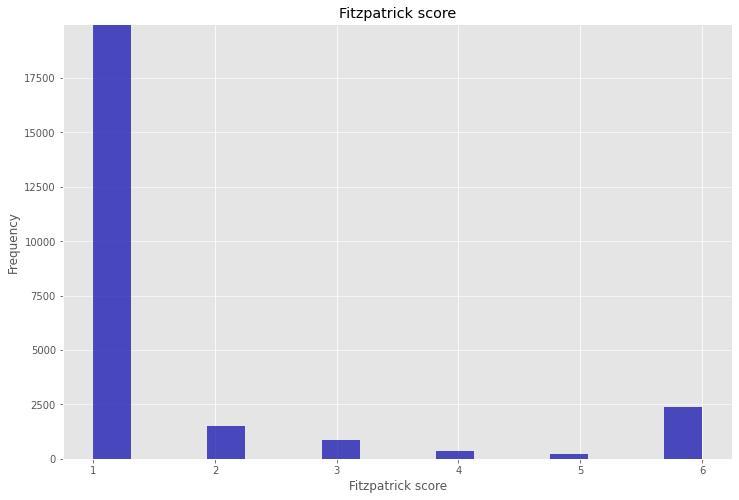

In [ ]:
# skin tone 

plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(x=whole_dataset["fitzpatrick"], bins='auto', color='#0504aa',
                            alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Fitzpatrick score')
plt.ylabel('Frequency')
plt.title('Fitzpatrick score')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

## For train split

In [ ]:
whole_dataset = pd.read_csv('/content/drive/MyDrive/Dissertation/skin_lesion_data/ISIC_2019_Training_Metadata_with_full_paths_with_brisque_and_class.csv')

In [ ]:
grouped_by_set = whole_dataset.groupby("rand_split")

test_only = grouped_by_set.get_group("test")
train_only = grouped_by_set.get_group("train")
val_only = grouped_by_set.get_group("val")

### Age

(0.0, 4080.0)

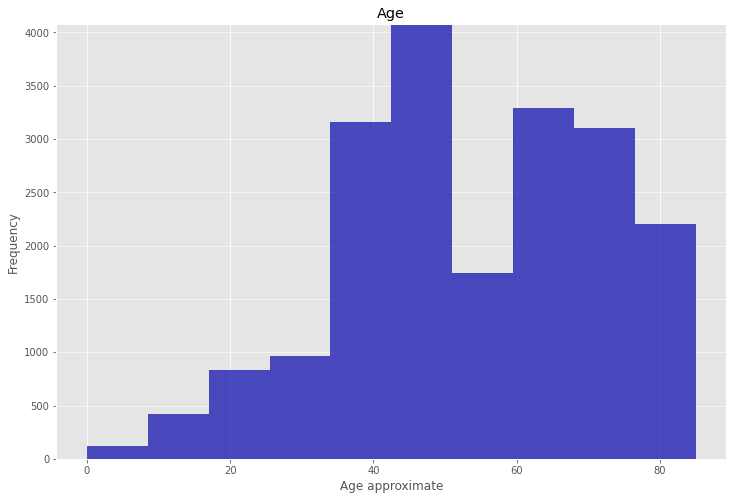

In [ ]:
# Histogram for age
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(x=train_only["age_approx"], color='#0504aa',
                            alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age approximate')
plt.ylabel('Frequency')
plt.title('Age')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

### Gender

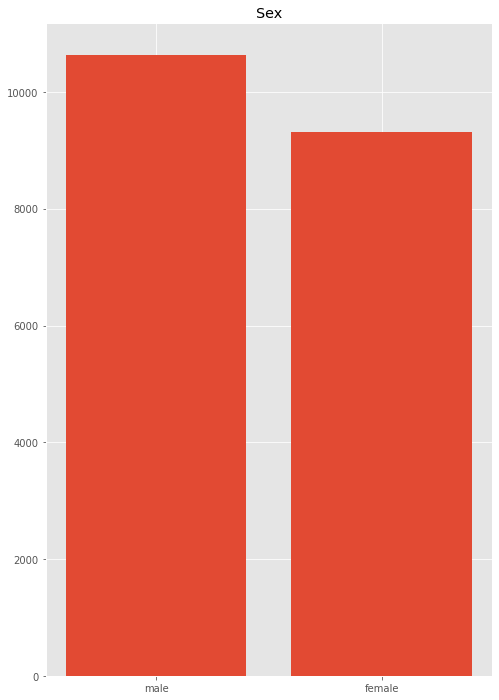

In [ ]:
# Histogram for gender
sex_df = train_only.sex.value_counts()
# sex_df.index

fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(1,1,1)
ax.bar(sex_df.index, sex_df.values)
ax.set_title('Sex')
plt.show()

### Lesion Anatomical Location

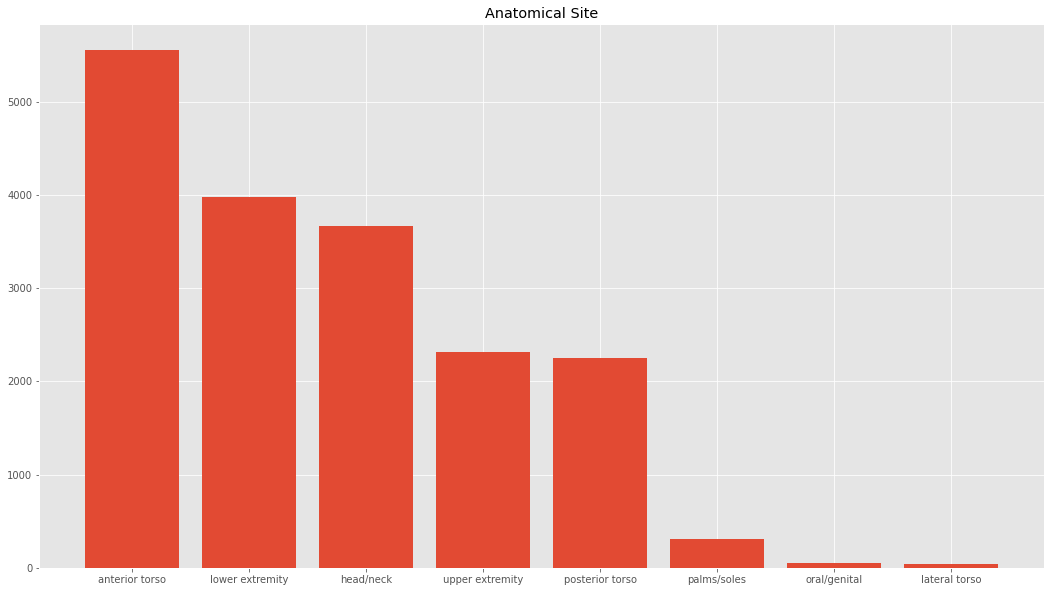

In [ ]:
site_df = train_only.anatom_site_general.value_counts()

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1,1,1)
ax.bar(site_df.index, site_df.values)
ax.set_title('Anatomical Site')
plt.show()

### Leison Class Type

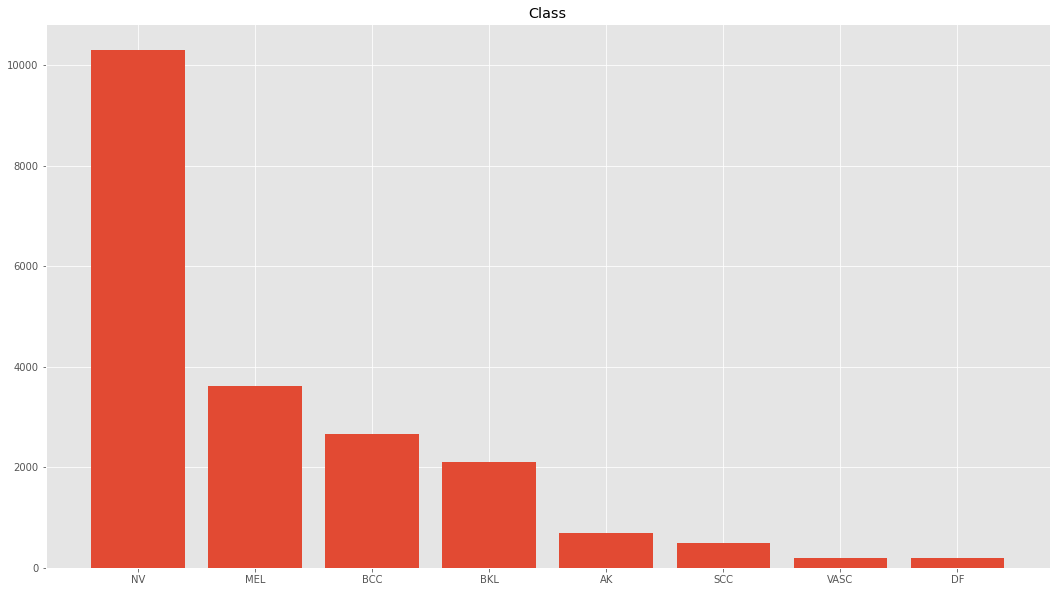

In [ ]:
class_df = train_only["class"].value_counts()

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1,1,1)
ax.bar(class_df.index, class_df.values)
ax.set_title('Class')
plt.show()

### BRISQUE distribution

(0.0, 840.0)

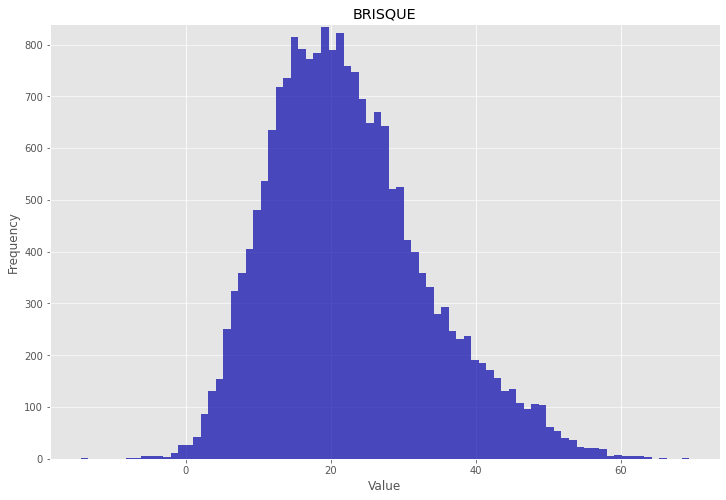

In [ ]:
# for brisque

# Histogram for BRISQUE 
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(x=train_only["brisque"], bins='auto', color='#0504aa',
                            alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('BRISQUE')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

### Skin Tone

(0.0, 16010.0)

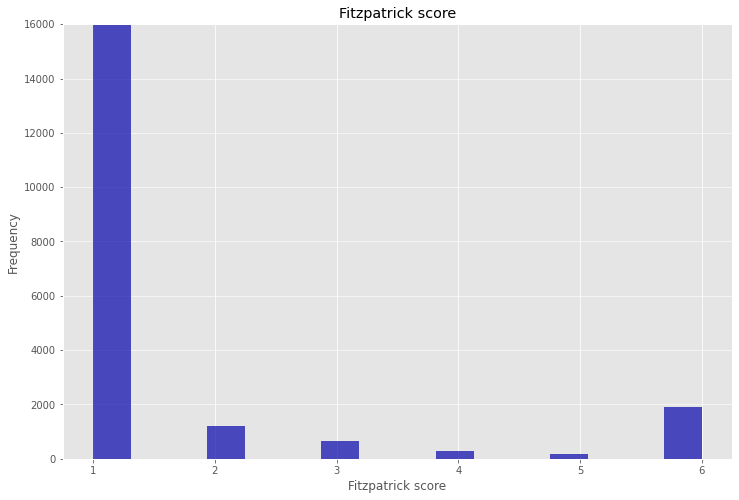

In [ ]:
# skin tone 

plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(x=train_only["fitzpatrick"], bins='auto', color='#0504aa',
                            alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Fitzpatrick score')
plt.ylabel('Frequency')
plt.title('Fitzpatrick score')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

 ## For test split

### Age

(0.0, 510.0)

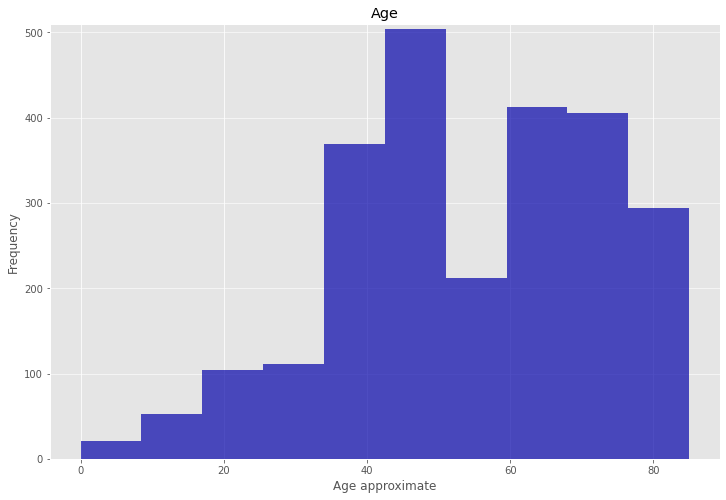

In [ ]:
# Histogram for age
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(x=test_only["age_approx"], color='#0504aa',
                            alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age approximate')
plt.ylabel('Frequency')
plt.title('Age')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

### Gender

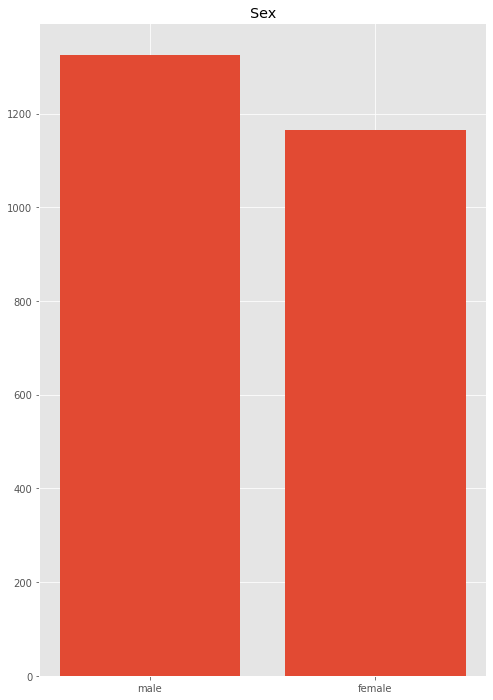

In [ ]:
# Histogram for gender
sex_df = test_only.sex.value_counts()
# sex_df.index

fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(1,1,1)
ax.bar(sex_df.index, sex_df.values)
ax.set_title('Sex')
plt.show()

### Lesion Anatomical Location

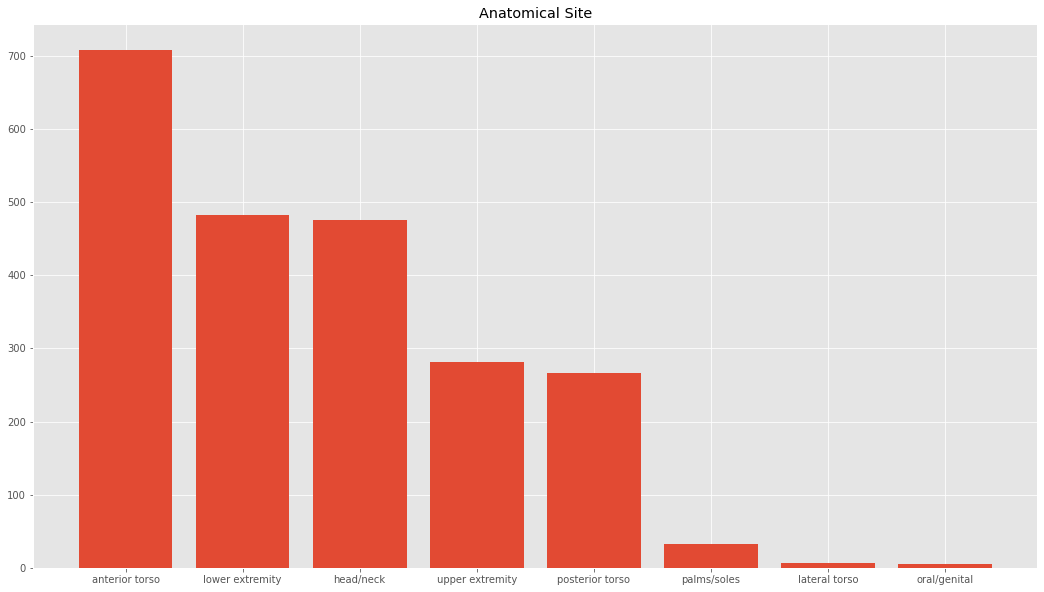

In [ ]:
site_df = test_only.anatom_site_general.value_counts()

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1,1,1)
ax.bar(site_df.index, site_df.values)
ax.set_title('Anatomical Site')
plt.show()

### Lesion Class Type

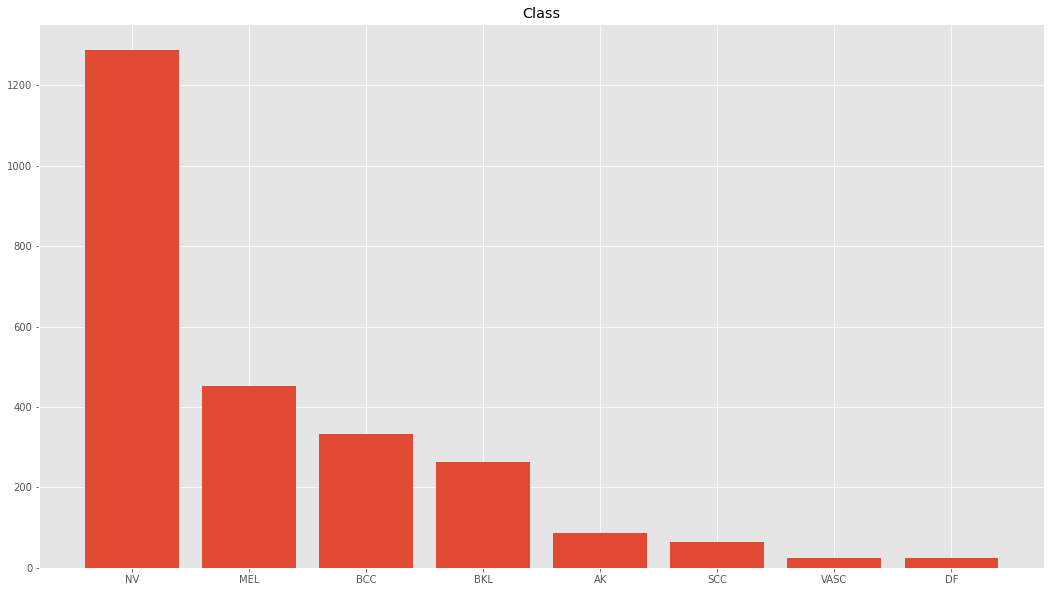

In [ ]:
class_df = test_only["class"].value_counts()

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1,1,1)
ax.bar(class_df.index, class_df.values)
ax.set_title('Class')
plt.show()

### BRISQUE distribution

(0.0, 220.0)

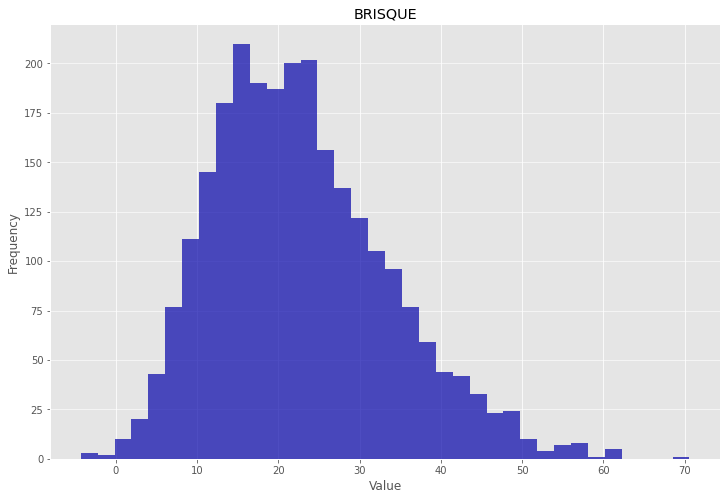

In [ ]:
# for brisque

# Histogram for BRISQUE 
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(x=test_only["brisque"], bins='auto', color='#0504aa',
                            alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('BRISQUE')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

### Skin Tone

(0.0, 1990.0)

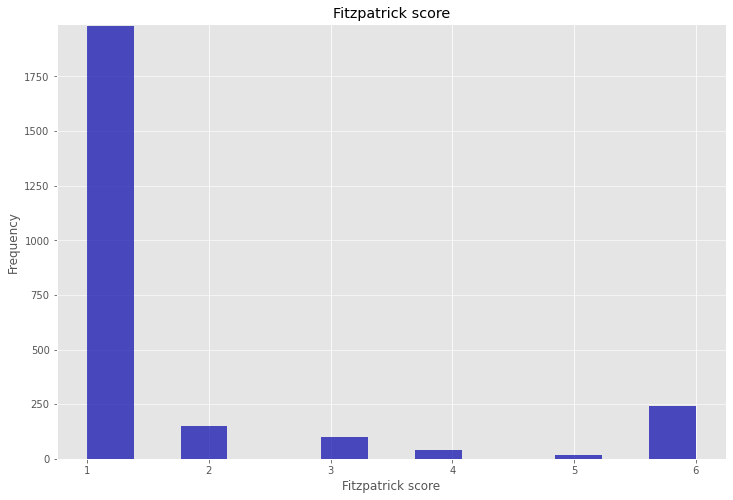

In [ ]:
# skin tone 

plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(x=test_only["fitzpatrick"], bins='auto', color='#0504aa',
                            alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Fitzpatrick score')
plt.ylabel('Frequency')
plt.title('Fitzpatrick score')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

## For validation split

### Age

(0.0, 500.0)

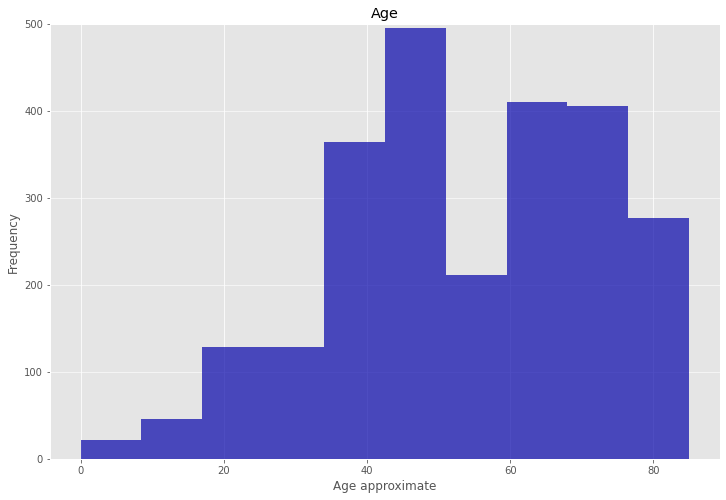

In [ ]:
# Histogram for age
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(x=val_only["age_approx"], color='#0504aa',
                            alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age approximate')
plt.ylabel('Frequency')
plt.title('Age')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

### Gender

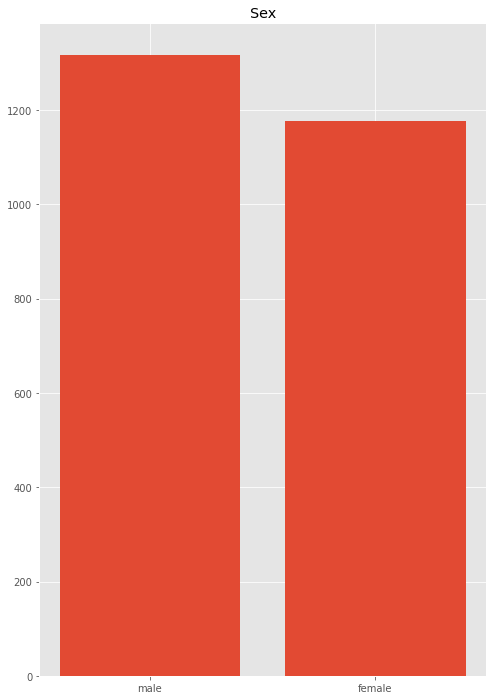

In [ ]:
# Histogram for gender
sex_df = val_only.sex.value_counts()
# sex_df.index

fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(1,1,1)
ax.bar(sex_df.index, sex_df.values)
ax.set_title('Sex')
plt.show()

### Lesion Anatomical Location

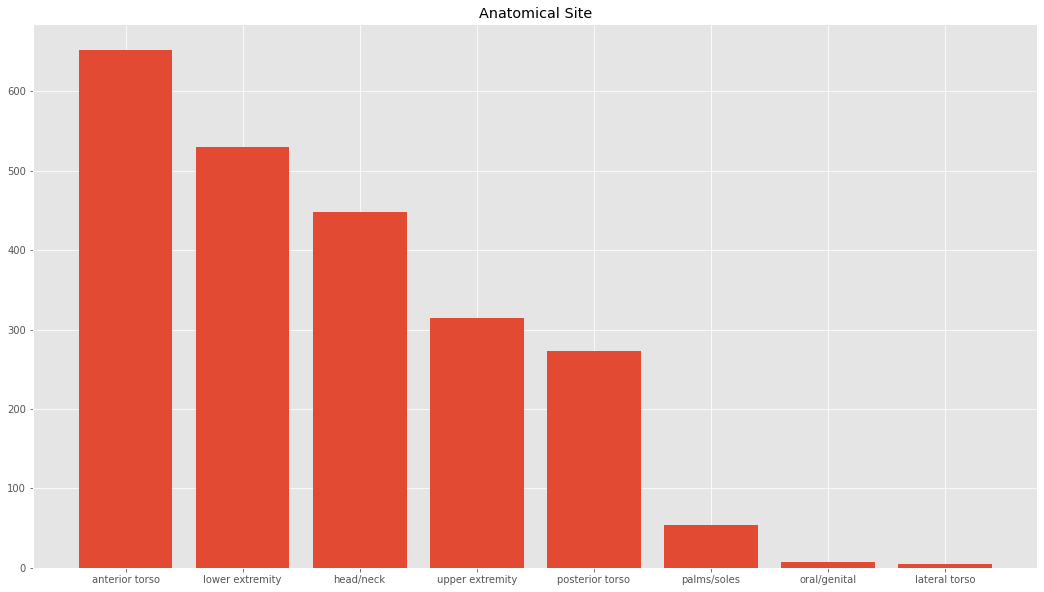

In [ ]:
site_df = val_only.anatom_site_general.value_counts()

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1,1,1)
ax.bar(site_df.index, site_df.values)
ax.set_title('Anatomical Site')
plt.show()

### Lesion Class Type

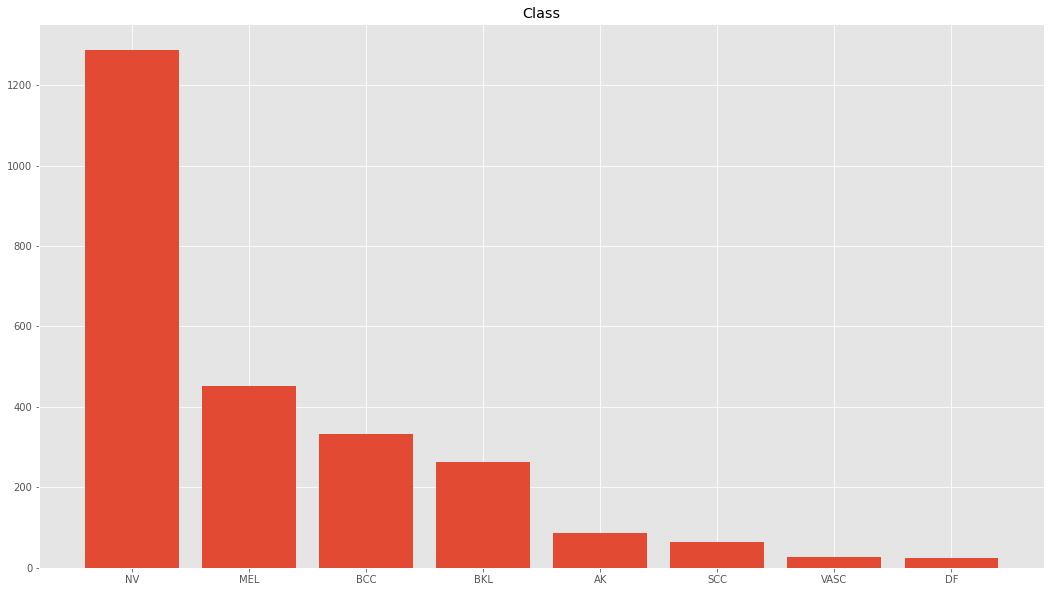

In [ ]:
class_df = val_only["class"].value_counts()

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1,1,1)
ax.bar(class_df.index, class_df.values)
ax.set_title('Class')
plt.show()

### BRISQUE distribution

(0.0, 220.0)

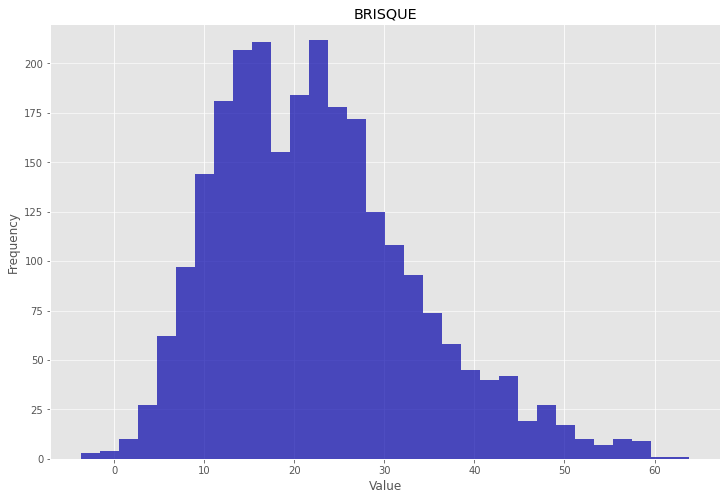

In [ ]:
# for brisque

# Histogram for BRISQUE 
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(x=val_only["brisque"], bins='auto', color='#0504aa',
                            alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('BRISQUE')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

### Skin Tone

(0.0, 2010.0)

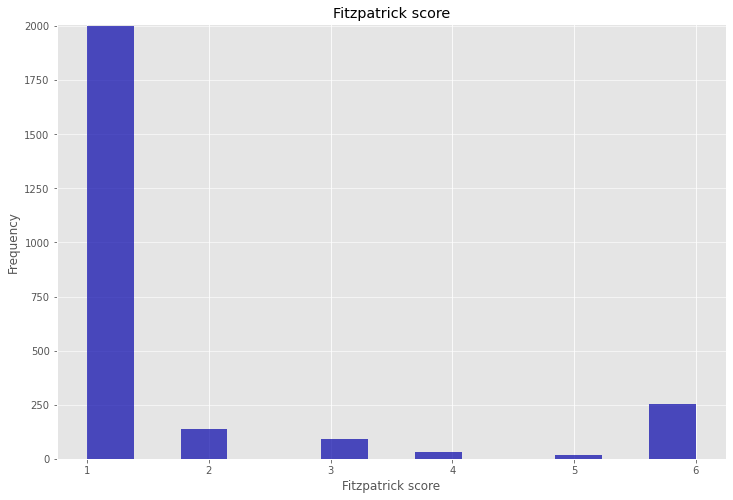

In [ ]:
# skin tone 

plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(x=val_only["fitzpatrick"], bins='auto', color='#0504aa',
                            alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Fitzpatrick score')
plt.ylabel('Frequency')
plt.title('Fitzpatrick score')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

# EDA of metadata variables by 8-lesion classes

In [ ]:
ages = whole_dataset["age_approx"].unique().tolist()
ages.sort()
print(ages)

[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, nan]


In [ ]:
lesion_sites = whole_dataset["anatom_site_general"].unique().tolist()

print(lesion_sites)

['anterior torso', 'upper extremity', 'posterior torso', 'lower extremity', nan, 'lateral torso', 'head/neck', 'palms/soles', 'oral/genital']


In [ ]:
gender = whole_dataset["sex"].unique().tolist()

print(gender)

['female', 'male', nan]


## Gender

In [ ]:
whole_dataset

,image,age_approx,anatom_site_general,lesion_id,sex,image_path,rand_split,fitzpatrick,brisque,class
0,ISIC_0000000,55.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,34.572449,NV
1,ISIC_0000001,30.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,44.077820,NV
2,ISIC_0000002,60.0,upper extremity,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,val,6.0,33.744324,MEL
3,ISIC_0000003,30.0,upper extremity,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,36.924500,NV
4,ISIC_0000004,80.0,posterior torso,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,61.345398,MEL
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,1.0,43.043640,BCC
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,37.097351,BKL
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,32.765320,MEL
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,/content/drive/MyDrive/Dissertation/skin_lesio...,val,3.0,48.839539,NV


In [ ]:
test_gender = test_only.groupby(["class", "sex"])["sex"].count()
test_gender = test_gender.to_frame()
test_gender


sex
class sex        
AK    female   37
      male     49
BCC   female  125
      male    208
BKL   female  118
      male    142
DF    female   14
      male     10
MEL   female  200
      male    245
NV    female  638
      male    618
SCC   female   22
      male     41
VASC  female   12
      male     13

## Age

In [ ]:
# pd.set_option('max_rows', 99999)
# pd.set_option('max_colwidth', 400)
# pd.describe_option('max_colwidth')


test_age = test_only.groupby(["class", "age_approx"])["age_approx"].count()
test_age = test_age.to_frame()
test_age



age_approx
class age_approx            
AK    30.0                 3
      45.0                 2
      50.0                 6
      55.0                 8
      60.0                13
...                      ...
VASC  55.0                 2
      60.0                 1
      70.0                 3
      75.0                 2
      80.0                 3

[103 rows x 1 columns]

## Leison Anatomical Location

In [ ]:
test_location = test_only.groupby(["class", "anatom_site_general"])["anatom_site_general"].count()
test_location = test_location.to_frame()
test_location

anatom_site_general
class anatom_site_general                     
AK    anterior torso                        11
      head/neck                             57
      lower extremity                        6
      palms/soles                            1
      upper extremity                       10
BCC   anterior torso                       101
      head/neck                            113
      lower extremity                       57
      posterior torso                       25
      upper extremity                       32
BKL   anterior torso                        45
      head/neck                            100
      lateral torso                          2
      lower extremity                       35
      oral/genital                           1
      palms/soles                            1
      posterior torso                       27
      upper extremity                       24
DF    anterior torso                         5
      lower extremity                       14
      upper extremity                        5
MEL   anterior torso                       133
      head/neck                             98
      lateral torso                          2
      lower extremity                       76
      oral/genital                           2
      palms/soles                           14
      posterior torso                       45
      upper extremity                       70
NV    anterior torso                       396
      head/neck                             82
      lateral torso                          2
      lower extremity                      276
      oral/genital                           2
      palms/soles                           16
      posterior torso                      165
      upper extremity                      125
SCC   anterior torso                         9
      head/neck                             23
      lower extremity                       12
      palms/soles                            1
      posterior torso                        3
      upper extremity                       14
VASC  anterior torso                         8
      head/neck                              2
      lower extremity                        7
      posterior torso                        2
      upper extremity                        1

## Skin Tone

In [ ]:
test_colour = test_only.groupby(["class", "fitzpatrick"])["fitzpatrick"].count()
test_colour = test_colour.to_frame()
test_colour

fitzpatrick
class fitzpatrick             
AK    1.0                   69
      2.0                    5
      3.0                    2
      4.0                    2
      5.0                    2
      6.0                    6
BCC   1.0                  255
      2.0                   17
      3.0                   23
      4.0                   11
      5.0                    3
      6.0                   24
BKL   1.0                  207
      2.0                   17
      3.0                    7
      4.0                    6
      5.0                    3
      6.0                   23
DF    1.0                    9
      2.0                    3
      3.0                    1
      4.0                    1
      6.0                   10
MEL   1.0                  382
      2.0                   21
      3.0                   13
      4.0                    3
      5.0                    3
      6.0                   30
NV    1.0                  988
      2.0                   83
      3.0                   49
      4.0                   18
      5.0                    8
      6.0                  142
SCC   1.0                   48
      2.0                    5
      3.0                    3
      4.0                    1
      6.0                    6
VASC  1.0                   22
      2.0                    1
      6.0                    2

# EDA of metadata variables by for binary class dataset (melanoma vs non-melanoma) 

## For whole dataset

In [ ]:
# need to make a new table, in which all the non-melanoma classes are renamed to non-mel 
pd.reset_option("^display")
mel_vs_no_mel = whole_dataset.replace(["NV", "BCC", "BKL", "AK", "SCC", "VASC", "DF"], "NON_MEL")

mel_vs_no_mel

,image,age_approx,anatom_site_general,lesion_id,sex,image_path,rand_split,fitzpatrick,brisque,class
0,ISIC_0000000,55.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,34.572449,NON_MEL
1,ISIC_0000001,30.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,44.077820,NON_MEL
2,ISIC_0000002,60.0,upper extremity,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,val,6.0,33.744324,MEL
3,ISIC_0000003,30.0,upper extremity,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,36.924500,NON_MEL
4,ISIC_0000004,80.0,posterior torso,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,61.345398,MEL
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,1.0,43.043640,NON_MEL
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,37.097351,NON_MEL
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,32.765320,MEL
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,/content/drive/MyDrive/Dissertation/skin_lesio...,val,3.0,48.839539,NON_MEL


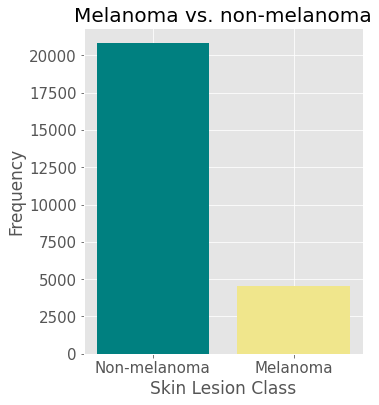

In [ ]:
mel_df = mel_vs_no_mel["class"].value_counts()

fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(1,1,1)
ax.bar(mel_df.index, mel_df.values, color=["teal", "khaki"])
ax.set_title('Melanoma vs. non-melanoma', fontsize=20)
ax.set_xlabel("Skin Lesion Class", fontsize=17)
ax.set_ylabel("Frequency", fontsize=17)
ax.set_xticklabels(["Non-melanoma","Melanoma"])
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
plt.show()



### Age



In [ ]:
# whole dataset
# pd.set_option('max_rows', 99999)
# pd.set_option('max_colwidth', 400)
# pd.describe_option('max_colwidth')


MEL_age = mel_vs_no_mel.groupby(["class", "age_approx"])["age_approx"].count()
MEL_age

class    age_approx
MEL      5.0              1
         10.0             1
         15.0             5
         20.0            18
         25.0            45
         30.0           102
         35.0           176
         40.0           258
         45.0           373
         50.0           464
         55.0           401
         60.0           410
         65.0           478
         70.0           570
         75.0           383
         80.0           391
         85.0           361
NON_MEL  0.0             54
         5.0            112
         10.0           141
         15.0           370
         20.0           370
         25.0           632
         30.0          1097
         35.0          1475
         40.0          1988
         45.0          2212
         50.0          2025
         55.0          1769
         60.0          1626
         65.0          1597
         70.0          1550
         75.0          1413
         80.0          1068
         85.0           958


### Gender


In [ ]:
MEL_gender = mel_vs_no_mel.groupby(["class", "sex"])["sex"].count()
MEL_gender

class    sex   
MEL      female     1980
         male       2461
NON_MEL  female     9681
         male      10825
Name: sex, dtype: int64

### Lesion Anatomical Location


In [ ]:
MEL_location = mel_vs_no_mel.groupby(["class", "anatom_site_general"])["anatom_site_general"].count()
MEL_location

class    anatom_site_general
MEL      anterior torso         1331
         head/neck               880
         lateral torso            14
         lower extremity         796
         oral/genital             19
         palms/soles             201
         posterior torso         430
         upper extremity         724
NON_MEL  anterior torso         5584
         head/neck              3707
         lateral torso            40
         lower extremity        4194
         oral/genital             40
         palms/soles             197
         posterior torso        2357
         upper extremity        2186
Name: anatom_site_general, dtype: int64

### Skin Tone


In [ ]:
MEL_colour = mel_vs_no_mel.groupby(["class", "fitzpatrick"])["fitzpatrick"].count()
MEL_colour

class    fitzpatrick
MEL      1.0             3805
         2.0              212
         3.0              109
         4.0               50
         5.0               28
         6.0              318
NON_MEL  1.0            16182
         2.0             1295
         3.0              752
         4.0              297
         5.0              200
         6.0             2083
Name: fitzpatrick, dtype: int64

## For test split

In [ ]:
mel_grouped_by_set = mel_vs_no_mel.groupby("rand_split")

mel_test_only = mel_grouped_by_set.get_group("test")

### Age

In [ ]:
MEL_test_age = mel_test_only.groupby(["class", "age_approx"])["age_approx"].count()
MEL_test_age

class    age_approx
MEL      15.0            1
         20.0            3
         25.0            3
         30.0            9
         35.0           24
         40.0           22
         45.0           38
         50.0           48
         55.0           32
         60.0           30
         65.0           57
         70.0           57
         75.0           42
         80.0           42
         85.0           37
NON_MEL  0.0             8
         5.0            13
         10.0           12
         15.0           39
         20.0           41
         25.0           57
         30.0          102
         35.0          148
         40.0          175
         45.0          210
         50.0          208
         55.0          180
         60.0          159
         65.0          167
         70.0          167
         75.0          140
         80.0          107
         85.0          108
Name: age_approx, dtype: int64

### Gender

In [ ]:
MEL_test_gender = mel_test_only.groupby(["class", "sex"])["sex"].count()
MEL_test_gender

class    sex   
MEL      female     200
         male       245
NON_MEL  female     966
         male      1081
Name: sex, dtype: int64

### Lesion Anatomical Location

In [ ]:
MEL_test_location = mel_test_only.groupby(["class", "anatom_site_general"])["anatom_site_general"].count()
MEL_test_location

class    anatom_site_general
MEL      anterior torso         133
         head/neck               98
         lateral torso            2
         lower extremity         76
         oral/genital             2
         palms/soles             14
         posterior torso         45
         upper extremity         70
NON_MEL  anterior torso         575
         head/neck              377
         lateral torso            4
         lower extremity        407
         oral/genital             3
         palms/soles             19
         posterior torso        222
         upper extremity        211
Name: anatom_site_general, dtype: int64

### Skin Tone

In [ ]:
MEL_test_tone = mel_test_only.groupby(["class", "fitzpatrick"])["fitzpatrick"].count()
MEL_test_tone

class    fitzpatrick
MEL      1.0             382
         2.0              21
         3.0              13
         4.0               3
         5.0               3
         6.0              30
NON_MEL  1.0            1598
         2.0             131
         3.0              85
         4.0              39
         5.0              16
         6.0             213
Name: fitzpatrick, dtype: int64

# Merging age groups into larger groups

This is because there is another in the melanoma class for very young people so going to add another column to the meta data so that the ages go into the following categories;
0-20, 21-40, 41-60 and >60



In [ ]:
# create a list of our conditions
# conditions = [
#     (total_meta_data['age_approx'] >= 0) & (total_meta_data['age_approx'] <= 20),
#     (total_meta_data['age_approx'] > 20) & (total_meta_data['age_approx'] <= 40),
#     (total_meta_data['age_approx'] > 40) & (total_meta_data['age_approx'] <= 60),
#     (total_meta_data['age_approx'] > 60)
#     ]

# # create a list of the values we want to assign for each condition
# values = ["0-20", '21-40', '41-60', '>60']

# # create a new column and use np.select to assign values to it using our lists as arguments
# mel_vs_no_mel['age_group'] = np.select(conditions, values, default=None)

# # display updated DataFrame
# mel_vs_no_mel.head()

# mel_vs_no_mel.to_csv('/content/drive/MyDrive/Dissertation/skin_lesion_data/mel_vs_nonmel.csv', index=False)

In [ ]:
# testing csv file

mel_age_group_metadata = pandas.read_csv('/content/drive/MyDrive/Dissertation/skin_lesion_data/mel_vs_nonmel.csv')
# print(mel_age_group_metadata)

mel_age_group_metadata["age_group"].unique()

mel_age_group_metadata.head()



,image,age_approx,anatom_site_general,lesion_id,sex,image_path,rand_split,fitzpatrick,brisque,class,age_group
0,ISIC_0000000,55.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,34.572449,NON_MEL,41-60
1,ISIC_0000001,30.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,train,6.0,44.077820,NON_MEL,21-40
2,ISIC_0000002,60.0,upper extremity,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,val,6.0,33.744324,MEL,41-60
3,ISIC_0000003,30.0,upper extremity,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,36.924500,NON_MEL,21-40
4,ISIC_0000004,80.0,posterior torso,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,61.345398,MEL,>60


In [ ]:
mel_grouped_by_set = mel_vs_no_mel.groupby("rand_split")

mel_test_only = mel_grouped_by_set.get_group("test")
mel_train_only = mel_grouped_by_set.get_group("train")

mel_test_age_group = mel_test_only.groupby(["class", "age_group"])["age_group"].count()
mel_test_age_group